In [1]:
# put the directory path to your LMR repository here
import sys
sys.path.append("/Users/dan/Desktop/LMR_py3/")
#!cd /Users/dan/Desktop/LMR_py3

# prefix for figure filename
#fig_prefix='prior_truth_'

In [2]:
import os
os.chdir('/Users/dan/Desktop/LMR_py3')
import LMR_lite_utils as LMRlite
import LMR_utils
import LMR_config
import numpy as np
import os,sys
from time import time
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature
from cartopy.util import add_cyclic_point
%matplotlib inline
import cartopy.util as cutil
import cartopy.crs as ccrs
from cartopy.mpl.geoaxes import GeoAxes
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib.cm as cm



Loading information from datasets.yml
Loading information from grid_def.yml


In [3]:
# Load and interpolate all of the priors I want to use as truth

def mk_ad():

    lmr_names = ['ccsm4_last_millenium.100',
                 'ccsm4_last_millenium.100.2',
                 'ccsm4_last_millenium.200',
                 'ccsm4_last_millenium.300',
                 'ccsm4_last_millenium.400',
                 'ccsm4_last_millenium.500',
                 'mpi-esm-p_last_millenium']
    model_names = ['CCSM4_100','CCSM4_100_2','CCSM4_200','CCSM4_300','CCSM4_400','CCSM4_500','MPI-ESM']

    # Initialize an array of various interpolated model fields
    ad = []

    import pdb
    pdb.set_trace()
    
    for ii in np.arange(len(lmr_names)):
        dd = {}
        cfile = './configs/config.yml.nullspace.'+lmr_names[ii]
        yaml_file = os.path.join(LMR_config.SRC_DIR,cfile)
        cfg = LMRlite.load_config(yaml_file)

        X, Xb_one = LMRlite.load_prior(cfg)
        Xbp = Xb_one - Xb_one.mean(axis=1,keepdims=True)

        # check if config is set to regrid the prior
        if cfg.prior.regrid_method:
            print('regridding prior...')
            # this function over-writes X, even if return is given a different name
            [X,Xb_one_new] = LMRlite.prior_regrid(cfg,X,Xb_one,verbose=False)
        else:
            X.trunc_state_info = X.full_state_info

        Xb_one = Xb_one_new
        Xbp = Xb_one - Xb_one.mean(axis=1,keepdims=True)

        dd['X']            = X
        dd['Xbp']          = Xbp
        dd['name']         = model_names[ii]
        dd['lmr_name']     = lmr_names[ii]
        dd['grid']         = LMRlite.Grid(X)
        dd['prox_manager'] = LMRlite.load_proxies(cfg)
        dd['numprox']      = len(LMRlite.load_proxies(cfg).all_proxies) 

        print(ii)
        print(dd['name'])

        ad.append(dd)
        
    return ad



In [ ]:
# Load and interpolate all of the priors I want to use as truth

lmr_names = ['ccsm4_last_millenium.100.2',
             'ccsm4_last_millenium.100.2',
             'ccsm4_last_millenium.100.2',
             'ccsm4_last_millenium.100.2',
             'ccsm4_last_millenium.100.2',
             'ccsm4_last_millenium.100.2']
model_names = ['CCSM4_100_1','CCSM4_100_2','CCSM4_100_3','CCSM4_100_4','CCSM4_100_5','CCSM4_100_6']

# Initialize an array of various interpolated model fields
ad100 = []

for ii in np.arange(len(lmr_names)):
    dd = {}
    cfile = './configs/config.yml.nullspace.'+lmr_names[ii]
    yaml_file = os.path.join(LMR_config.SRC_DIR,cfile)
    cfg = LMRlite.load_config(yaml_file)
    
    cfg_params = LMR_utils.param_cfg_update('core.seed','')
    cfg_new = LMR_config.Config(**cfg_params)
    cfg_params = LMR_utils.param_cfg_update('wrapper.multi_seed','')
    cfg_new = LMR_config.Config(**cfg_params)
    
    X, Xb_one = LMRlite.load_prior(cfg)
    Xbp = Xb_one - Xb_one.mean(axis=1,keepdims=True)
    
    # check if config is set to regrid the prior
    if cfg.prior.regrid_method:
        print('regridding prior...')
        # this function over-writes X, even if return is given a different name
        [X,Xb_one_new] = LMRlite.prior_regrid(cfg,X,Xb_one,verbose=False)
    else:
        X.trunc_state_info = X.full_state_info
    
    Xb_one = Xb_one_new
    Xbp = Xb_one - Xb_one.mean(axis=1,keepdims=True)
    grid = LMRlite.Grid(X)    
    
    dd['X']        = X
    dd['Xbp']      = Xbp
    dd['name']     = model_names[ii]
    dd['lmr_name'] = lmr_names[ii]
    dd['grid']     = grid

    print(ii)
    print(dd['name'])

    ad100.append(dd)
        


In [ ]:
# Load and interpolate all of the priors I want to use as truth
# This time: all 100-member ensembles with different draws

lmr_names = ['ccsm4_last_millenium.100.2',
             'ccsm4_last_millenium.100.2',
             'ccsm4_last_millenium.100.2',
             'ccsm4_last_millenium.100.2',
             'ccsm4_last_millenium.100.2',
             'ccsm4_last_millenium.100.2']
model_names = ['CCSM4_100_1','CCSM4_100_2','CCSM4_100_3','CCSM4_100_4','CCSM4_100_5','CCSM4_100_6']

# Initialize an array of various interpolated model fields
ad100 = []

for ii in np.arange(len(lmr_names)):
    dd = {}
    cfile = './configs/config.yml.nullspace.'+lmr_names[ii]
    yaml_file = os.path.join(LMR_config.SRC_DIR,cfile)
    cfg = LMRlite.load_config(yaml_file)
    
    cfg_params = LMR_utils.param_cfg_update('core.seed','')
    cfg_new = LMR_config.Config(**cfg_params)
    cfg_params = LMR_utils.param_cfg_update('wrapper.multi_seed','')
    cfg_new = LMR_config.Config(**cfg_params)
    
    X, Xb_one = LMRlite.load_prior(cfg)
    Xbp = Xb_one - Xb_one.mean(axis=1,keepdims=True)
    
    # check if config is set to regrid the prior
    if cfg.prior.regrid_method:
        print('regridding prior...')
        # this function over-writes X, even if return is given a different name
        [X,Xb_one_new] = LMRlite.prior_regrid(cfg,X,Xb_one,verbose=False)
    else:
        X.trunc_state_info = X.full_state_info
    
    Xb_one = Xb_one_new
    Xbp = Xb_one - Xb_one.mean(axis=1,keepdims=True)
    grid = LMRlite.Grid(X)    
    
    dd['X']        = X
    dd['Xbp']      = Xbp
    dd['name']     = model_names[ii]
    dd['lmr_name'] = lmr_names[ii]
    dd['grid']     = grid

    print(ii)
    print(dd['name'])

    ad100.append(dd)
        


In [ ]:
# Load and interpolate all of the priors I want to use as truth
# This time: all 100-member ensembles with different draws

lmr_names = ['ccsm4_last_millenium.500',
             'ccsm4_last_millenium.500',
             'ccsm4_last_millenium.500',
             'ccsm4_last_millenium.500',
             'ccsm4_last_millenium.500',
             'ccsm4_last_millenium.500']
model_names = ['CCSM4_500_1','CCSM4_500_2','CCSM4_500_3','CCSM4_500_4','CCSM4_500_5','CCSM4_500_6']

# Initialize an array of various interpolated model fields
ad500 = []

for ii in np.arange(len(lmr_names)):
    dd = {}
    cfile = './configs/config.yml.nullspace.'+lmr_names[ii]
    yaml_file = os.path.join(LMR_config.SRC_DIR,cfile)
    cfg = LMRlite.load_config(yaml_file)
    
    cfg_params = LMR_utils.param_cfg_update('core.seed','')
    cfg_new = LMR_config.Config(**cfg_params)
    cfg_params = LMR_utils.param_cfg_update('wrapper.multi_seed','')
    cfg_new = LMR_config.Config(**cfg_params)
    
    X, Xb_one = LMRlite.load_prior(cfg)
    Xbp = Xb_one - Xb_one.mean(axis=1,keepdims=True)
    
    # check if config is set to regrid the prior
    if cfg.prior.regrid_method:
        print('regridding prior...')
        # this function over-writes X, even if return is given a different name
        [X,Xb_one_new] = LMRlite.prior_regrid(cfg,X,Xb_one,verbose=False)
    else:
        X.trunc_state_info = X.full_state_info
    
    Xb_one = Xb_one_new
    Xbp = Xb_one - Xb_one.mean(axis=1,keepdims=True)
    grid = LMRlite.Grid(X)    
    
    dd['X']        = X
    dd['Xbp']      = Xbp
    dd['name']     = model_names[ii]
    dd['lmr_name'] = lmr_names[ii]
    dd['grid']     = grid

    print(ii)
    print(dd['name'])

    ad500.append(dd)
        


In [4]:
def mk_pproxies(X,Xbp,prox_manager,SNR,grid):

    """
    Construct pseudoproxies 
    """

    numprox = len(prox_manager.ind_assim)

    vY = np.zeros([numprox,grid.nens])
    vR = []
    vP = []

    for proxy_idx, Y in enumerate(prox_manager.sites_assim_proxy_objs()):
        # get grid indices
        tmp = grid.lat[:,0]-Y.lat
        itlat = np.argmin(np.abs(tmp))
        tmp = grid.lon[0,:]-Y.lon
        itlon = np.argmin(np.abs(tmp))
        npos = itlat*grid.nlon + itlon

        # Noise amplitude corresponding to SNR by stdev
        sig = np.std(Xbp[npos,:])
        #print(sig)
        #print(sig/SNR)
        # Make pproxies
        #import pdb
        #pdb.set_trace()
        randts = np.random.randn(grid.nens,)
        randtsn = randts/np.std(randts)
        vY[proxy_idx,:] = Xbp[npos,:] + randtsn*sig/SNR
        vR.append((sig/SNR)**2)
        vP.append(proxy_idx)

    return vY, vR, vP

In [5]:
def mk_yes(X,Xbp,prox_manager,grid):
    
    numprox = len(prox_manager.ind_assim)
    vYe = np.zeros([numprox,grid.nens])
    vYe_coords = np.zeros([numprox,2])

    for proxy_idx, Y in enumerate(prox_manager.sites_assim_proxy_objs()):
        # get grid indices
        tmp = grid.lat[:,0]-Y.lat
        itlat = np.argmin(np.abs(tmp))
        tmp = grid.lon[0,:]-Y.lon
        itlon = np.argmin(np.abs(tmp))
        npos = itlat*grid.nlon + itlon
        # the ensemble prior estimates
        vYe[proxy_idx,:] = Xbp[npos,:]
        vYe_coords[proxy_idx,:] = X.coords[npos,:]

    return vYe, vYe_coords

In [118]:
# Recon MPI 100 with a varying number of CCSM4 members


SNR = 100.
truthinds = np.array([6,6,6,6,6,6])
priorinds = np.array([0,1,2,3,4,5])

numex = len(priorinds)

LOCRAD = 0.

# Initialize array of dictionaries containing the different comparisons
cdd = []

# Loop over prior files
for iii in np.arange(numex):

    ii = priorinds[iii]
    
    # Load the config file corresponding to the iith prior
    cfile = './configs/config.yml.nullspace.'+lmr_names[ii]
    yaml_file = os.path.join(LMR_config.SRC_DIR,cfile)
    cfg = LMRlite.load_config(yaml_file)

    # Compute effective observations
    vYe, vYe_coords = mk_yes(ad[ii]['X'],ad[ii]['Xbp'],prox_manager,ad[ii]['grid'])

    # change the localization radius in the config file
    cfg_params = LMR_utils.param_cfg_update('core.loc_rad',LOCRAD)
    cfg_new = LMR_config.Config(**cfg_params)

    # Loop over truth files
    #for jjj in np.arange(numex):

    jj = truthinds[iii]
    vY, vR, vP = mk_pproxies(ad[jj]['X'],ad[jj]['Xbp'],prox_manager,SNR,ad[jj]['grid'])
    NENS = ad[jj]['grid'].nens

    fp = np.empty([ad[ii]['grid'].nlon*ad[ii]['grid'].nlat,NENS])

    # Loop over ensemble members in truth. f are the reconstructions.
    for kk in np.arange(NENS):

        if LOCRAD==0.:
            f,Xa,_ = LMRlite.Kalman_optimal(vY[:,kk],vR,vYe,ad[ii]['Xbp'],verbose=False)
        else:
            f,Xa = LMRlite.Kalman_ESRF(cfg_new,vY[:,kk],vR,vYe,ad[ii]['Xbp'],X=ad[ii]['X'],vYe_coords=vYe_coords,verbose=False)

        xam = Xa.mean(axis=1)
        Xap = np.subtract(Xa,xam[:,None])
        #import pdb;  pdb.set_trace()
        fp[:,kk]    = f

    # Store information in a dictionary for this prior-truth pair
    c = {}
    c['locrad']     = LOCRAD
    c['snr']        = SNR
    c['prior_name'] = ad[ii]['name']
    c['truth_name'] = ad[jj]['name']
    c['pind']       = ii
    c['tind']       = jj
    c['recon']      = fp
    #c['rmse']       = np.mean((ad[jj]['Xbp'][:,:NENS]-fp)**2,1)**.5
    c['rmse']       = np.mean((ad[jj]['Xbp']-fp)**2,1)**.5

    # Concatenate the dictionary to a list corresponding to all prior-truth pairs 
    # for the choices of LOCRAD and SNR
    cdd.append(c)

# Save all prior-truth pairs for these choices of LOCRAD and SNR
print('saving for LOCRAD = '+ str(LOCRAD) + ' and SNR = '+ str(SNR))
np.save('/Users/dan/Desktop/Nullspace/pt_out/PAGES2k_locrad_Nens_tests_mpi_noseed' + str(LOCRAD)+ '_snr_' + str(SNR),cdd)
print('Done!')        

Checking configuration ... 
OK!
Checking configuration ... 
OK!
Checking configuration ... 
OK!
Checking configuration ... 
OK!
Checking configuration ... 
OK!
Checking configuration ... 
OK!
saving for LOCRAD = 0.0 and SNR = 100.0
Done!


In [119]:
# CCSM4: Recon 100 member with a varying number of other members

SNR = 100.
truthinds = np.array([0,0,0,0,0,0])
priorinds = np.array([0,1,2,3,4,5])

numex = len(priorinds)

LOCRAD = 0.

# Initialize array of dictionaries containing the different comparisons
cdd = []

# Loop over prior files
for iii in np.arange(numex):

    ii = priorinds[iii]
    
    # Load the config file corresponding to the iith prior
    cfile = './configs/config.yml.nullspace.'+lmr_names[ii]
    yaml_file = os.path.join(LMR_config.SRC_DIR,cfile)
    cfg = LMRlite.load_config(yaml_file)

    # Compute effective observations
    vYe, vYe_coords = mk_yes(ad[ii]['X'],ad[ii]['Xbp'],prox_manager,ad[ii]['grid'])

    # change the localization radius in the config file
    cfg_params = LMR_utils.param_cfg_update('core.loc_rad',LOCRAD)
    cfg_new = LMR_config.Config(**cfg_params)

    # Loop over truth files
    #for jjj in np.arange(numex):

    jj = truthinds[iii]
    # Use a precomputed interpolated version of the truth
    vY, vR, vP = mk_pproxies(ad[jj]['X'],ad[jj]['Xbp'],prox_manager,SNR,ad[jj]['grid'])
    NENS = ad[jj]['grid'].nens

    fp = np.empty([ad[ii]['grid'].nlon*ad[ii]['grid'].nlat,NENS])

    # Loop over ensemble members in truth. f are the reconstructions.
    for kk in np.arange(NENS):

        if LOCRAD==0.:
            f,Xa,_ = LMRlite.Kalman_optimal(vY[:,kk],vR,vYe,ad[ii]['Xbp'],verbose=False)
        else:
            f,Xa = LMRlite.Kalman_ESRF(cfg_new,vY[:,kk],vR,vYe,ad[ii]['Xbp'],X=ad[ii]['X'],vYe_coords=vYe_coords,verbose=False)

        xam = Xa.mean(axis=1)
        Xap = np.subtract(Xa,xam[:,None])
        #import pdb;  pdb.set_trace()
        fp[:,kk]    = f

    # Store information in a dictionary for this prior-truth pair
    c = {}
    c['locrad']     = LOCRAD
    c['snr']        = SNR
    c['prior_name'] = ad[ii]['name']
    c['truth_name'] = ad[jj]['name']
    c['pind']       = ii
    c['tind']       = jj
    c['recon']      = fp
    c['rmse']       = np.mean((ad[jj]['Xbp']-fp)**2,1)**.5
    #c['rmse']       = np.mean((ad[jj]['Xbp'][:,:NENS]-fp)**2,1)**.5

    # Concatenate the dictionary to a list corresponding to all prior-truth pairs 
    # for the choices of LOCRAD and SNR
    cdd.append(c)

# Save all prior-truth pairs for these choices of LOCRAD and SNR
print('saving for LOCRAD = '+ str(LOCRAD) + ' and SNR = '+ str(SNR))
np.save('/Users/dan/Desktop/Nullspace/pt_out/PAGES2k_locrad_Nens_tests_ccsm4_noseed' + str(LOCRAD)+ '_snr_' + str(SNR),cdd)
print('Done!')        

Checking configuration ... 
OK!
Checking configuration ... 
OK!
Checking configuration ... 
OK!
Checking configuration ... 
OK!
Checking configuration ... 
OK!
Checking configuration ... 
OK!
saving for LOCRAD = 0.0 and SNR = 100.0
Done!


In [168]:
# CCSM4: Recon 500 member with other 500 members. 6x6.

SNR = 100.
truthinds = np.array([0,1,2,3,4,5])
priorinds = np.array([0,1,2,3,4,5])

numex = len(priorinds)

LOCRAD = 0.

adxx = ad500

# Initialize array of dictionaries containing the different comparisons
cdd = []

# Loop over prior files
for iii in np.arange(numex):

    ii = priorinds[iii]
    
    # Load the config file corresponding to the iith prior
    cfile = './configs/config.yml.nullspace.'+lmr_names[ii]
    yaml_file = os.path.join(LMR_config.SRC_DIR,cfile)
    cfg = LMRlite.load_config(yaml_file)

    # Compute effective observations
    vYe, vYe_coords = mk_yes(adxx[ii]['X'],adxx[ii]['Xbp'],prox_manager,adxx[ii]['grid'])

    # change the localization radius in the config file
    cfg_params = LMR_utils.param_cfg_update('core.loc_rad',LOCRAD)
    cfg_new = LMR_config.Config(**cfg_params)

    # Loop over truth files
    for jjj in np.arange(numex):

    #jj = truthinds[iii]
        jj = truthinds[jjj]
        # Use a precomputed interpolated version of the truth
        vY, vR, vP = mk_pproxies(adxx[jj]['X'],adxx[jj]['Xbp'],prox_manager,SNR,adxx[jj]['grid'])
        NENS = adxx[jj]['grid'].nens

        fp = np.empty([adxx[ii]['grid'].nlon*adxx[ii]['grid'].nlat,NENS])

        # Loop over ensemble members in truth. f are the reconstructions.
        for kk in np.arange(NENS):

            if LOCRAD==0.:
                f,Xa,_ = LMRlite.Kalman_optimal(vY[:,kk],vR,vYe,adxx[ii]['Xbp'],verbose=False)
            else:
                f,Xa = LMRlite.Kalman_ESRF(cfg_new,vY[:,kk],vR,vYe,adxx[ii]['Xbp'],X=adxx[ii]['X'],vYe_coords=vYe_coords,verbose=False)

            xam = Xa.mean(axis=1)
            Xap = np.subtract(Xa,xam[:,None])
            #import pdb;  pdb.set_trace()
            fp[:,kk]    = f

        # Store information in a dictionary for this prior-truth pair
        c = {}
        c['locrad']     = LOCRAD
        c['snr']        = SNR
        c['prior_name'] = adxx[ii]['name']
        c['truth_name'] = adxx[jj]['name']
        c['pind']       = ii
        c['tind']       = jj
        c['recon']      = fp
        c['rmse']       = np.mean((adxx[jj]['Xbp']-fp)**2,1)**.5
        #c['rmse']       = np.mean((ad[jj]['Xbp'][:,:NENS]-fp)**2,1)**.5

        # Concatenate the dictionary to a list corresponding to all prior-truth pairs 
        # for the choices of LOCRAD and SNR
        cdd.append(c)

# Save all prior-truth pairs for these choices of LOCRAD and SNR
print('saving for LOCRAD = '+ str(LOCRAD) + ' and SNR = '+ str(SNR))
np.save('/Users/dan/Desktop/Nullspace/pt_out/PAGES2k_locrad_Nens_tests_ccsm4_noseed_all500_' + str(LOCRAD)+ '_snr_' + str(SNR),cdd)
print('Done!')        

Checking configuration ... 
OK!
Checking configuration ... 
OK!
Checking configuration ... 
OK!
Checking configuration ... 
OK!
Checking configuration ... 
OK!
Checking configuration ... 
OK!
saving for LOCRAD = 0.0 and SNR = 100.0
Done!


In [164]:
# CCSM4: Recon 100 member with other 100 members. 6x6.

SNR = 100.
truthinds = np.array([0,1,2,3,4,5])
priorinds = np.array([0,1,2,3,4,5])

numex = len(priorinds)

LOCRAD = 0.

# Initialize array of dictionaries containing the different comparisons
cdd = []

# Loop over prior files
for iii in np.arange(numex):

    ii = priorinds[iii]
    
    # Load the config file corresponding to the iith prior
    cfile = './configs/config.yml.nullspace.'+lmr_names[ii]
    yaml_file = os.path.join(LMR_config.SRC_DIR,cfile)
    cfg = LMRlite.load_config(yaml_file)

    # Compute effective observations
    vYe, vYe_coords = mk_yes(ad100[ii]['X'],ad100[ii]['Xbp'],prox_manager,ad100[ii]['grid'])

    # change the localization radius in the config file
    cfg_params = LMR_utils.param_cfg_update('core.loc_rad',LOCRAD)
    cfg_new = LMR_config.Config(**cfg_params)

    # Loop over truth files
    for jjj in np.arange(numex):

    #jj = truthinds[iii]
        jj = truthinds[jjj]
        # Use a precomputed interpolated version of the truth
        vY, vR, vP = mk_pproxies(ad100[jj]['X'],ad100[jj]['Xbp'],prox_manager,SNR,ad100[jj]['grid'])
        NENS = ad100[jj]['grid'].nens

        fp = np.empty([ad100[ii]['grid'].nlon*ad100[ii]['grid'].nlat,NENS])

        # Loop over ensemble members in truth. f are the reconstructions.
        for kk in np.arange(NENS):

            if LOCRAD==0.:
                f,Xa,_ = LMRlite.Kalman_optimal(vY[:,kk],vR,vYe,ad100[ii]['Xbp'],verbose=False)
            else:
                f,Xa = LMRlite.Kalman_ESRF(cfg_new,vY[:,kk],vR,vYe,ad100[ii]['Xbp'],X=ad100[ii]['X'],vYe_coords=vYe_coords,verbose=False)

            xam = Xa.mean(axis=1)
            Xap = np.subtract(Xa,xam[:,None])
            #import pdb;  pdb.set_trace()
            fp[:,kk]    = f

        # Store information in a dictionary for this prior-truth pair
        c = {}
        c['locrad']     = LOCRAD
        c['snr']        = SNR
        c['prior_name'] = ad100[ii]['name']
        c['truth_name'] = ad100[jj]['name']
        c['pind']       = ii
        c['tind']       = jj
        c['recon']      = fp
        c['rmse']       = np.mean((ad100[jj]['Xbp']-fp)**2,1)**.5
        #c['rmse']       = np.mean((ad[jj]['Xbp'][:,:NENS]-fp)**2,1)**.5

        # Concatenate the dictionary to a list corresponding to all prior-truth pairs 
        # for the choices of LOCRAD and SNR
        cdd.append(c)

# Save all prior-truth pairs for these choices of LOCRAD and SNR
print('saving for LOCRAD = '+ str(LOCRAD) + ' and SNR = '+ str(SNR))
np.save('/Users/dan/Desktop/Nullspace/pt_out/PAGES2k_locrad_Nens_tests_ccsm4_noseed_all100_' + str(LOCRAD)+ '_snr_' + str(SNR),cdd)
print('Done!')        

Checking configuration ... 
OK!
Checking configuration ... 
OK!
Checking configuration ... 
OK!
Checking configuration ... 
OK!
Checking configuration ... 
OK!
Checking configuration ... 
OK!
saving for LOCRAD = 0.0 and SNR = 0.4
Done!


In [120]:
# CCSM4: Recon a varying number of truth members with prior 100

SNR = 100.
priorinds = np.array([0,0,0,0,0,0])
truthinds = np.array([0,1,2,3,4,5])

numex = len(priorinds)

LOCRAD = 0.

# Initialize array of dictionaries containing the different comparisons
cdd = []

# Loop over prior files
for iii in np.arange(numex):

    ii = priorinds[iii]
    
    # Load the config file corresponding to the iith prior
    cfile = './configs/config.yml.nullspace.'+lmr_names[ii]
    yaml_file = os.path.join(LMR_config.SRC_DIR,cfile)
    cfg = LMRlite.load_config(yaml_file)

    # Compute effective observations
    vYe, vYe_coords = mk_yes(ad[ii]['X'],ad[ii]['Xbp'],prox_manager,ad[ii]['grid'])

    # change the localization radius in the config file
    cfg_params = LMR_utils.param_cfg_update('core.loc_rad',LOCRAD)
    cfg_new = LMR_config.Config(**cfg_params)

    # Loop over truth files
    #for jjj in np.arange(numex):

    jj = truthinds[iii]
    # Use a precomputed interpolated version of the truth
    vY, vR, vP = mk_pproxies(ad[jj]['X'],ad[jj]['Xbp'],prox_manager,SNR,ad[jj]['grid'])
    NENS = ad[jj]['grid'].nens

    fp = np.empty([ad[ii]['grid'].nlon*ad[ii]['grid'].nlat,NENS])

    # Loop over ensemble members in truth. f are the reconstructions.
    for kk in np.arange(NENS):

        if LOCRAD==0.:
            f,Xa,_ = LMRlite.Kalman_optimal(vY[:,kk],vR,vYe,ad[ii]['Xbp'],verbose=False)
        else:
            f,Xa = LMRlite.Kalman_ESRF(cfg_new,vY[:,kk],vR,vYe,ad[ii]['Xbp'],X=ad[ii]['X'],vYe_coords=vYe_coords,verbose=False)

        xam = Xa.mean(axis=1)
        Xap = np.subtract(Xa,xam[:,None])
        #import pdb;  pdb.set_trace()
        fp[:,kk]    = f

    # Store information in a dictionary for this prior-truth pair
    c = {}
    c['locrad']     = LOCRAD
    c['snr']        = SNR
    c['prior_name'] = ad[ii]['name']
    c['truth_name'] = ad[jj]['name']
    c['pind']       = ii
    c['tind']       = jj
    c['recon']      = fp
    c['rmse']       = np.mean((ad[jj]['Xbp']-fp)**2,1)**.5
    #c['rmse']       = np.mean((ad[jj]['Xbp'][:,:NENS]-fp)**2,1)**.5

    # Concatenate the dictionary to a list corresponding to all prior-truth pairs 
    # for the choices of LOCRAD and SNR
    cdd.append(c)

# Save all prior-truth pairs for these choices of LOCRAD and SNR
print('saving for LOCRAD = '+ str(LOCRAD) + ' and SNR = '+ str(SNR))
np.save('/Users/dan/Desktop/Nullspace/pt_out/PAGES2k_locrad_Nens_tests_ccsm4_varytruthNens_noseed' + str(LOCRAD)+ '_snr_' + str(SNR),cdd)
print('Done!')        

Checking configuration ... 
OK!
Checking configuration ... 
OK!
Checking configuration ... 
OK!
Checking configuration ... 
OK!
Checking configuration ... 
OK!
Checking configuration ... 
OK!
saving for LOCRAD = 0.0 and SNR = 100.0
Done!


In [145]:
# CCSM4: Matching

SNR = 1000.
priorinds = np.array([0,1,2,3,4,5])
truthinds = np.array([0,1,2,3,4,5])

numex = len(priorinds)

LOCRAD = 0.

# Initialize array of dictionaries containing the different comparisons
cdd = []

# Loop over prior files
for iii in np.arange(numex):

    ii = priorinds[iii]
    
    # Load the config file corresponding to the iith prior
    cfile = './configs/config.yml.nullspace.'+lmr_names[ii]
    yaml_file = os.path.join(LMR_config.SRC_DIR,cfile)
    cfg = LMRlite.load_config(yaml_file)

    # Compute effective observations
    vYe, vYe_coords = mk_yes(ad[ii]['X'],ad[ii]['Xbp'],prox_manager,ad[ii]['grid'])

    # change the localization radius in the config file
    cfg_params = LMR_utils.param_cfg_update('core.loc_rad',LOCRAD)
    cfg_new = LMR_config.Config(**cfg_params)

    # Loop over truth files
    #for jjj in np.arange(numex):

    jj = truthinds[iii]
    # Use a precomputed interpolated version of the truth
    vY, vR, vP = mk_pproxies(ad[jj]['X'],ad[jj]['Xbp'],prox_manager,SNR,ad[jj]['grid'])
    NENS = ad[jj]['grid'].nens

    fp = np.empty([ad[ii]['grid'].nlon*ad[ii]['grid'].nlat,NENS])

    # Loop over ensemble members in truth. f are the reconstructions.
    for kk in np.arange(NENS):

        if LOCRAD==0.:
            f,Xa,_ = LMRlite.Kalman_optimal(vY[:,kk],vR,vYe,ad[ii]['Xbp'],verbose=False)
        else:
            f,Xa = LMRlite.Kalman_ESRF(cfg_new,vY[:,kk],vR,vYe,ad[ii]['Xbp'],X=ad[ii]['X'],vYe_coords=vYe_coords,verbose=False)

        xam = Xa.mean(axis=1)
        Xap = np.subtract(Xa,xam[:,None])
        #import pdb;  pdb.set_trace()
        fp[:,kk]    = f

    # Store information in a dictionary for this prior-truth pair
    c = {}
    c['locrad']     = LOCRAD
    c['snr']        = SNR
    c['prior_name'] = ad[ii]['name']
    c['truth_name'] = ad[jj]['name']
    c['pind']       = ii
    c['tind']       = jj
    c['recon']      = fp
    c['rmse']       = np.mean((ad[jj]['Xbp']-fp)**2,1)**.5
    #c['rmse']       = np.mean((ad[jj]['Xbp'][:,:NENS]-fp)**2,1)**.5

    # Concatenate the dictionary to a list corresponding to all prior-truth pairs 
    # for the choices of LOCRAD and SNR
    cdd.append(c)

# Save all prior-truth pairs for these choices of LOCRAD and SNR
print('saving for LOCRAD = '+ str(LOCRAD) + ' and SNR = '+ str(SNR))
np.save('/Users/dan/Desktop/Nullspace/pt_out/PAGES2k_locrad_Nens_tests_ccsm4_match' + str(LOCRAD)+ '_snr_' + str(SNR),cdd)
print('Done!')        

Checking configuration ... 
OK!
Checking configuration ... 
OK!
Checking configuration ... 
OK!
Checking configuration ... 
OK!
Checking configuration ... 
OK!
Checking configuration ... 
OK!
saving for LOCRAD = 0.0 and SNR = 1000.0
Done!


In [121]:
# Matching prior and truth members


SNR = 100.
truthinds = np.array([0,1,2,3,4,5])
priorinds = np.array([0,1,2,3,4,5])

numex = len(priorinds)

LOCRAD = 0.

# Initialize array of dictionaries containing the different comparisons
cdd = []

# Loop over prior files
for iii in np.arange(numex):

    ii = priorinds[iii]
    
    # Load the config file corresponding to the iith prior
    cfile = './configs/config.yml.nullspace.'+lmr_names[ii]
    yaml_file = os.path.join(LMR_config.SRC_DIR,cfile)
    cfg = LMRlite.load_config(yaml_file)

    # Compute effective observations
    vYe, vYe_coords = mk_yes(ad[ii]['X'],ad[ii]['Xbp'],prox_manager,ad[ii]['grid'])

    # change the localization radius in the config file
    cfg_params = LMR_utils.param_cfg_update('core.loc_rad',LOCRAD)
    cfg_new = LMR_config.Config(**cfg_params)

    # Loop over truth files
    # for jjj in np.arange(numex):

    jj = truthinds[iii]
    # Use a precomputed interpolated version of the truth
    vY, vR, vP = mk_pproxies(ad[jj]['X'],ad[jj]['Xbp'],prox_manager,SNR,ad[jj]['grid'])
    NENS = ad[jj]['grid'].nens

    fp = np.empty([ad[ii]['grid'].nlon*ad[ii]['grid'].nlat,NENS])

    # Loop over ensemble members in truth. f are the reconstructions.
    for kk in np.arange(NENS):

        if LOCRAD==0.:
            f,Xa,_ = LMRlite.Kalman_optimal(vY[:,kk],vR,vYe,ad[ii]['Xbp'],verbose=False)
        else:
            f,Xa = LMRlite.Kalman_ESRF(cfg_new,vY[:,kk],vR,vYe,ad[ii]['Xbp'],X=ad[ii]['X'],vYe_coords=vYe_coords,verbose=False)

        xam = Xa.mean(axis=1)
        Xap = np.subtract(Xa,xam[:,None])
        #import pdb;  pdb.set_trace()
        fp[:,kk]    = f

    # Store information in a dictionary for this prior-truth pair
    c = {}
    c['locrad']     = LOCRAD
    c['snr']        = SNR
    c['prior_name'] = ad[ii]['name']
    c['truth_name'] = ad[jj]['name']
    c['pind']       = ii
    c['tind']       = jj
    c['recon']      = fp
    c['rmse']       = np.mean((ad[jj]['Xbp']-fp)**2,1)**.5

    # Concatenate the dictionary to a list corresponding to all prior-truth pairs 
    # for the choices of LOCRAD and SNR
    cdd.append(c)

# Save all prior-truth pairs for these choices of LOCRAD and SNR
print('saving for LOCRAD = '+ str(LOCRAD) + ' and SNR = '+ str(SNR))
np.save('/Users/dan/Desktop/Nullspace/pt_out/PAGES2k_locrad_Nens_tests_ccsm4_match_noseed' + str(LOCRAD)+ '_snr_' + str(SNR),cdd)
print('Done!')        

Checking configuration ... 
OK!
Checking configuration ... 
OK!
Checking configuration ... 
OK!
Checking configuration ... 
OK!
Checking configuration ... 
OK!
Checking configuration ... 
OK!
saving for LOCRAD = 0.0 and SNR = 100.0
Done!


In [211]:
# Matching prior and truth members
# Removing mean of reconstruction


SNR = 100.
truthinds = np.array([0,1,2,3,4,5])
priorinds = np.array([0,1,2,3,4,5])

numex = len(priorinds)

LOCRAD = 0.

# Initialize array of dictionaries containing the different comparisons
cdd = []

# Loop over prior files
for iii in np.arange(numex):

    ii = priorinds[iii]
    
    # Load the config file corresponding to the iith prior
    cfile = './configs/config.yml.nullspace.'+lmr_names[ii]
    yaml_file = os.path.join(LMR_config.SRC_DIR,cfile)
    cfg = LMRlite.load_config(yaml_file)

    # Compute effective observations
    vYe, vYe_coords = mk_yes(ad[ii]['X'],ad[ii]['Xbp'],prox_manager,ad[ii]['grid'])

    # change the localization radius in the config file
    cfg_params = LMR_utils.param_cfg_update('core.loc_rad',LOCRAD)
    cfg_new = LMR_config.Config(**cfg_params)

    # Loop over truth files
    # for jjj in np.arange(numex):

    jj = truthinds[iii]
    # Use a precomputed interpolated version of the truth
    vY, vR, vP = mk_pproxies(ad[jj]['X'],ad[jj]['Xbp'],prox_manager,SNR,ad[jj]['grid'])
    NENS = ad[jj]['grid'].nens

    fp = np.empty([ad[ii]['grid'].nlon*ad[ii]['grid'].nlat,NENS])

    # Loop over ensemble members in truth. f are the reconstructions.
    for kk in np.arange(NENS):

        if LOCRAD==0.:
            f,Xa,_ = LMRlite.Kalman_optimal(vY[:,kk],vR,vYe,ad[ii]['Xbp'],verbose=False)
        else:
            f,Xa = LMRlite.Kalman_ESRF(cfg_new,vY[:,kk],vR,vYe,ad[ii]['Xbp'],X=ad[ii]['X'],vYe_coords=vYe_coords,verbose=False)

        xam = Xa.mean(axis=1)
        Xap = np.subtract(Xa,xam[:,None])
        #import pdb;  pdb.set_trace()
        fp[:,kk]    = f

    fpm = fp.mean(axis=1)
    fpnm = np.subtract(fp,fpm[:,None])
        
    # Store information in a dictionary for this prior-truth pair
    c = {}
    c['locrad']     = LOCRAD
    c['snr']        = SNR
    c['prior_name'] = ad[ii]['name']
    c['truth_name'] = ad[jj]['name']
    c['pind']       = ii
    c['tind']       = jj
    c['recon']      = fpnm
    c['rmse']       = np.mean((ad[jj]['Xbp']-fpnm)**2,1)**.5

    # Concatenate the dictionary to a list corresponding to all prior-truth pairs 
    # for the choices of LOCRAD and SNR
    cdd.append(c)

# Save all prior-truth pairs for these choices of LOCRAD and SNR
print('saving for LOCRAD = '+ str(LOCRAD) + ' and SNR = '+ str(SNR))
np.save('/Users/dan/Desktop/Nullspace/pt_out/PAGES2k_locrad_Nens_tests_ccsm4_match_noseed_nomean_' + str(LOCRAD)+ '_snr_' + str(SNR),cdd)
print('Done!')        

Checking configuration ... 
OK!
Checking configuration ... 
OK!
Checking configuration ... 
OK!
Checking configuration ... 
OK!
Checking configuration ... 
OK!
Checking configuration ... 
OK!
saving for LOCRAD = 0.0 and SNR = 100.0
Done!


In [26]:
# Sandbox

def mkcdd(ad):
    

    SNR = 100.
    truthinds = np.array([0,1,2,3,4,5])
    priorinds = np.array([0,1,2,3,4,5])

    numex = len(priorinds)

    LOCRAD = 0.

    # Initialize array of dictionaries containing the different comparisons
    cdd = []

    # Loop over prior files
    for iii in np.arange(numex):

        ii = priorinds[iii]

        # Load the config file corresponding to the iith prior
        cfile = './configs/config.yml.nullspace.'+ad[ii]['lmr_name']
        yaml_file = os.path.join(LMR_config.SRC_DIR,cfile)
        cfg = LMRlite.load_config(yaml_file)

        # Compute effective observations
        vYe, vYe_coords = mk_yes(ad[ii]['X'],ad[ii]['Xbp'],ad[ii]['prox_manager'],ad[ii]['grid'])

        # change the localization radius in the config file
        #cfg_params = LMR_utils.param_cfg_update('core.loc_rad',LOCRAD)
        #cfg_new = LMR_config.Config(**cfg_params)

        # Loop over truth files
        # for jjj in np.arange(numex):

        jj = truthinds[iii]
        # Use a precomputed interpolated version of the truth
        vY, vR, vP = mk_pproxies(ad[jj]['X'],ad[jj]['Xbp'],ad[jj]['prox_manager'],SNR,ad[jj]['grid'])

        #vYm = vYym.mean(axis=1)
        #vY = np.subtract(vYym,vYm[:,None])

        NENS = ad[jj]['grid'].nens

        fp = np.empty([ad[jj]['grid'].nlon*ad[jj]['grid'].nlat,NENS])

        # Loop over ensemble members in truth. f are the reconstructions.
        for kk in np.arange(NENS):

            f,Xa,_ = LMRlite.Kalman_optimal(vY[:,kk],vR,vYe,ad[ii]['Xbp'],verbose=False)
            fp[:,kk]    = f

        #fpm = fp.mean(axis=1)
        #fpnm = np.subtract(fp,fpm[:,None])

        # Store information in a dictionary for this prior-truth pair
        c = {}
        c['locrad']     = LOCRAD
        c['snr']        = SNR
        c['prior_name'] = ad[ii]['name']
        c['truth_name'] = ad[jj]['name']
        c['pind']       = ii
        c['tind']       = jj
        c['recon']      = fp
        c['rmse']       = np.mean((ad[jj]['Xbp']-fp)**2,1)**.5
        c['grid']       = ad[ii]['grid']

        # Concatenate the dictionary to a list corresponding to all prior-truth pairs 
        # for the choices of LOCRAD and SNR
        cdd.append(c)

    savename = '/Users/dan/Desktop/Nullspace/pt_out/PAGES2k_locrad_Nens_tests_ccsm4_match_noseed_nomean_' + str(LOCRAD)+ '_snr_' + str(SNR) + '.npy'
    # Save all prior-truth pairs for these choices of LOCRAD and SNR
    print('saving for LOCRAD = '+ str(LOCRAD) + ' and SNR = '+ str(SNR))
    np.save(savename,cdd)
    print(savename)
    print('Done!') 
    
    return savename

In [ ]:
# Matching prior and truth members and using ESRF


SNR = 100.
truthinds = np.array([1,2,3,4,5])
priorinds = np.array([1,2,3,4,5])

numex = len(priorinds)

LOCRAD = 10000000.

# Initialize array of dictionaries containing the different comparisons
cdd = []

# Loop over prior files
for iii in np.arange(numex):

    ii = priorinds[iii]
    
    # Load the config file corresponding to the iith prior
    cfile = './configs/config.yml.nullspace.'+lmr_names[ii]
    yaml_file = os.path.join(LMR_config.SRC_DIR,cfile)
    cfg = LMRlite.load_config(yaml_file)

    # Compute effective observations
    vYe, vYe_coords = mk_yes(ad[ii]['X'],ad[ii]['Xbp'],prox_manager,ad[ii]['grid'])

    # change the localization radius in the config file
    cfg_params = LMR_utils.param_cfg_update('core.loc_rad',LOCRAD)
    cfg_new = LMR_config.Config(**cfg_params)

    # Loop over truth files
    # for jjj in np.arange(numex):

    jj = truthinds[iii]
    # Use a precomputed interpolated version of the truth
    vY, vR, vP = mk_pproxies(ad[jj]['X'],ad[jj]['Xbp'],prox_manager,SNR,ad[jj]['grid'])
    NENS = ad[jj]['grid'].nens

    fp = np.empty([ad[ii]['grid'].nlon*ad[ii]['grid'].nlat,NENS])

    # Loop over ensemble members in truth. f are the reconstructions.
    for kk in np.arange(NENS):

        f,Xa = LMRlite.Kalman_ESRF(cfg_new,vY[:,kk],vR,vYe,ad[ii]['Xbp'],X=ad[ii]['X'],vYe_coords=vYe_coords,verbose=False)
        xam = Xa.mean(axis=1)
        Xap = np.subtract(Xa,xam[:,None])
        #import pdb;  pdb.set_trace()
        fp[:,kk]    = f

    # Store information in a dictionary for this prior-truth pair
    c = {}
    c['locrad']     = LOCRAD
    c['snr']        = SNR
    c['prior_name'] = ad[ii]['name']
    c['truth_name'] = ad[jj]['name']
    c['pind']       = ii
    c['tind']       = jj
    c['recon']      = fp
    c['rmse']       = np.mean((ad[jj]['Xbp']-fp)**2,1)**.5

    # Concatenate the dictionary to a list corresponding to all prior-truth pairs 
    # for the choices of LOCRAD and SNR
    cdd.append(c)

# Save all prior-truth pairs for these choices of LOCRAD and SNR
print('saving for LOCRAD = '+ str(LOCRAD) + ' and SNR = '+ str(SNR))
np.save('/Users/dan/Desktop/Nullspace/pt_out/PAGES2k_locrad_Nens_tests_ccsm4_match_noseed_esrf' + str(LOCRAD)+ '_snr_' + str(SNR),cdd)
print('Done!')        

In [29]:
# Plot RMS error

def plt_rmse(cdd,title):

    import cartopy.util as cutil
    import cartopy.crs as ccrs
    from cartopy.mpl.geoaxes import GeoAxes
    from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
    from mpl_toolkits.axes_grid1 import AxesGrid
    import matplotlib.cm as cm

    projection = ccrs.PlateCarree(central_longitude=0.)
    axes_class = (GeoAxes,
                  dict(map_projection=projection))

    fig = plt.figure(figsize=(16,12))
    axgr = AxesGrid(fig, 111, axes_class=axes_class,
                    nrows_ncols=(2,3),
                    axes_pad=0.6,
                    cbar_location='right',
    #               cbar_mode='each',
                    cbar_mode='single',
                    cbar_pad=0.2,
                    cbar_size='3%',
                    cbar_set_cax=False,
                    label_mode='')  # note the empty label_mode

    for ii, ax in enumerate(axgr):

        rmsc = cdd[ii]['rmse']
        grid = cdd[ii]['grid']
        
        cldat = rmsc.reshape(grid.nlat,grid.nlon)
        wrap_data, wrap_lon = cutil.add_cyclic_point(cldat, coord=grid.lon[0,:], axis=1)

        plt.sca(axgr[ii])
        p=plt.pcolormesh(wrap_lon,grid.lat[:,0],wrap_data,vmax=2.0,vmin=0.,
                        transform=projection,
                        cmap='YlOrRd',
                        )

        ax.coastlines(color='gray')
        #if cdd[ii]['pind']==2:
            #lon_formatter = LongitudeFormatter(zero_direction_label=True)
            #ax.xaxis.set_major_formatter(lon_formatter)
            #ax.set_xticks(np.linspace(-180, 180, 5), crs=projection)

        #if cdd[ii]['tind'] == 0:
            #ax.set_yticks(np.linspace(-80, 80, 5), crs=projection)
            #lat_formatter = LatitudeFormatter()
            #ax.yaxis.set_major_formatter(lat_formatter)

        plt.title('Prior: '+ cdd[ii]['prior_name'] + ', truth: ' + cdd[ii]['truth_name'])
        
    cb=axgr.cbar_axes[0].colorbar(p)
    fig.suptitle(title, fontsize=18,y=.77)
#    plt.tight_layout
    #plt.show();


In [8]:
# Plot RMS error

def plt_rmse6(cdd,title):

    import cartopy.util as cutil
    import cartopy.crs as ccrs
    from cartopy.mpl.geoaxes import GeoAxes
    from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
    from mpl_toolkits.axes_grid1 import AxesGrid
    import matplotlib.cm as cm

    projection = ccrs.PlateCarree(central_longitude=0.)
    axes_class = (GeoAxes,
                  dict(map_projection=projection))

    fig = plt.figure(figsize=(24,18))
    axgr = AxesGrid(fig, 111, axes_class=axes_class,
                    nrows_ncols=(6, 6),
                    axes_pad=0.6,
                    cbar_location='right',
    #               cbar_mode='each',
                    cbar_mode='single',
                    cbar_pad=0.2,
                    cbar_size='3%',
                    cbar_set_cax=False,
                    label_mode='')  # note the empty label_mode

    for ii, ax in enumerate(axgr):

        rmsc = cdd[ii]['rmse']

        cldat = rmsc.reshape(grid.nlat,grid.nlon)
        wrap_data, wrap_lon = cutil.add_cyclic_point(cldat, coord=grid.lon[0,:], axis=1)

        plt.sca(axgr[ii])
        p=plt.pcolormesh(wrap_lon,grid.lat[:,0],wrap_data,vmax=2.0,vmin=0.,
                        transform=projection,
                        cmap='YlOrRd',
                        )

        ax.coastlines(color='gray')
        #if cdd[ii]['pind']==2:
            #lon_formatter = LongitudeFormatter(zero_direction_label=True)
            #ax.xaxis.set_major_formatter(lon_formatter)
            #ax.set_xticks(np.linspace(-180, 180, 5), crs=projection)

        #if cdd[ii]['tind'] == 0:
            #ax.set_yticks(np.linspace(-80, 80, 5), crs=projection)
            #lat_formatter = LatitudeFormatter()
            #ax.yaxis.set_major_formatter(lat_formatter)

        plt.title('P: '+ cdd[ii]['prior_name'] + ', T: ' + cdd[ii]['truth_name'])
        
    cb=axgr.cbar_axes[0].colorbar(p)
    fig.suptitle(title, fontsize=18,y=1.)
#    plt.tight_layout
    #plt.show();


/Users/dan/anaconda2/envs/lmr_py3/lib/python3.6/site-packages/cartopy/util.py:102: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  new_data = ma.concatenate((data, data[slicer]), axis=axis)


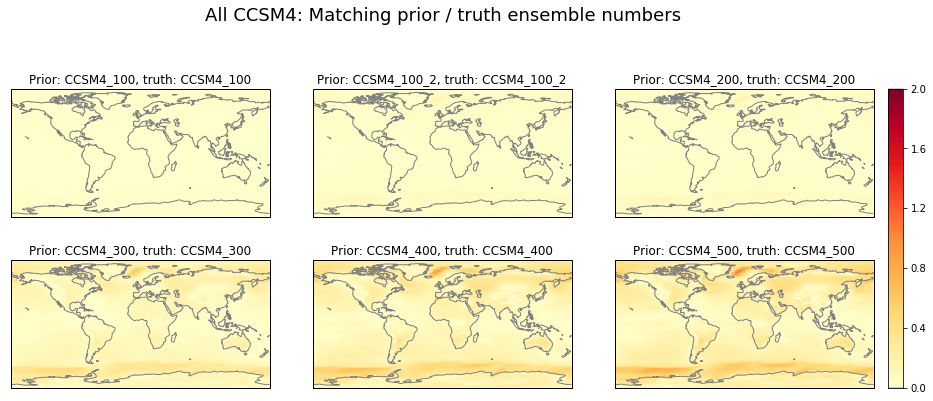

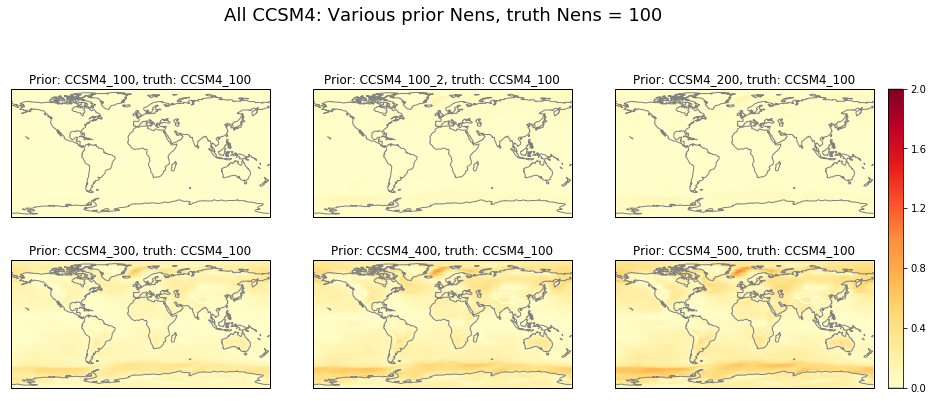

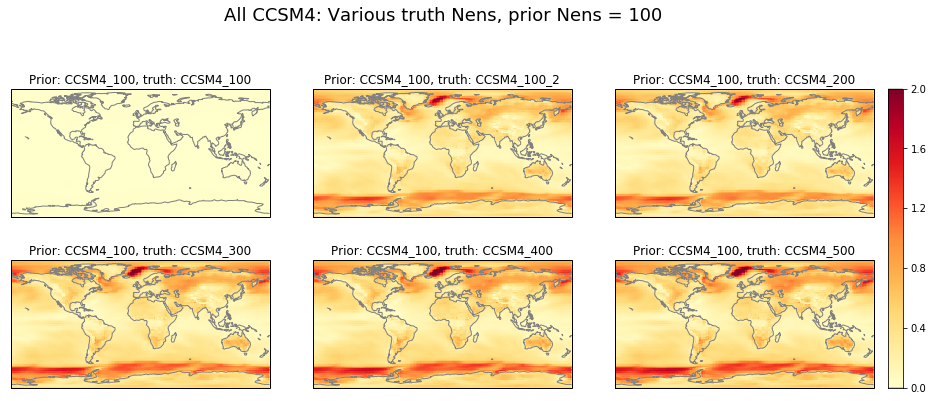

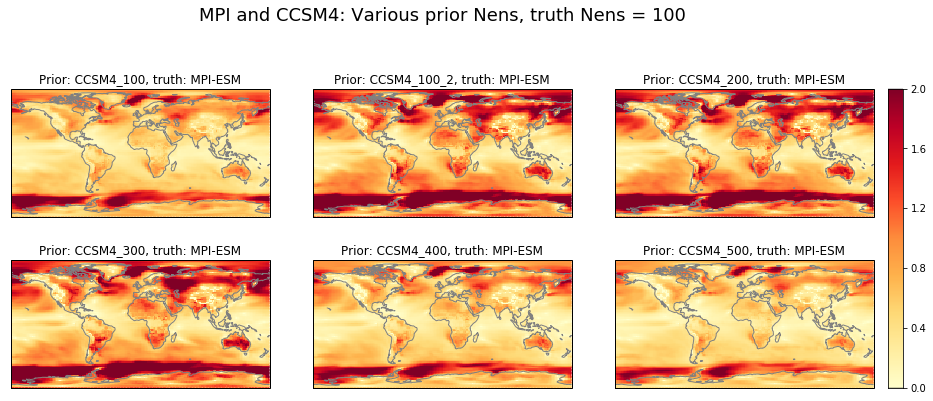

In [66]:
# Plot posterior covs for each

LOCRAD = 0.0
SNR = 100.0

cdd = np.load('/Users/dan/Desktop/Nullspace/pt_out/PAGES2k_locrad_Nens_tests_ccsm4_match_new0.0_snr_100.0.npy')
plt_rmse(cdd,'All CCSM4: Matching prior / truth ensemble numbers')

cdd = np.load('/Users/dan/Desktop/Nullspace/pt_out/PAGES2k_locrad_Nens_tests_ccsm40.0_snr_100.0.npy')
plt_rmse(cdd,'All CCSM4: Various prior Nens, truth Nens = 100')

cdd = np.load('/Users/dan/Desktop/Nullspace/pt_out/PAGES2k_locrad_Nens_tests_ccsm4_varytruthNens0.0_snr_100.0.npy')
plt_rmse(cdd,'All CCSM4: Various truth Nens, prior Nens = 100')

cdd = np.load('/Users/dan/Desktop/Nullspace/pt_out/PAGES2k_locrad_Nens_tests_mpi0.0_snr_100.0.npy')
plt_rmse(cdd,'MPI and CCSM4: Various prior Nens, truth Nens = 100')




In [115]:
# Testing seeds etc.

cfile = './configs/config.yml.nullspace.ccsm4_last_millenium.100.2'
yaml_file = os.path.join(LMR_config.SRC_DIR,cfile)
cfg = LMRlite.load_config(yaml_file)
#cfg_params = LMR_utils.param_cfg_update('core.seed','')
#cfg_new = LMR_config.Config(**cfg_params)
#cfg_params = LMR_utils.param_cfg_update('core.nens',200)
#cfg_new = LMR_config.Config(**cfg_params)
cfg_params = LMR_utils.param_cfg_update('wrapper.multi_seed','')
cfg_new = LMR_config.Config(**cfg_params)


X, Xb_one = LMRlite.load_prior(cfg)
Xbp = Xb_one - Xb_one.mean(axis=1,keepdims=True)

# check if config is set to regrid the prior
if cfg.prior.regrid_method:
    print('regridding prior...')
    # this function over-writes X, even if return is given a different name
    [X,Xb_one_new] = LMRlite.prior_regrid(cfg,X,Xb_one,verbose=False)
else:
    X.trunc_state_info = X.full_state_info

Xb_one = Xb_one_new
Xbp = Xb_one - Xb_one.mean(axis=1,keepdims=True)
grid = LMRlite.Grid(X)    

dd['X']        = X
dd['Xbp']      = Xbp
dd['name']     = model_names[ii]
dd['lmr_name'] = lmr_names[ii]
dd['grid']     = grid



Checking configuration ... 
OK!
Reading file:  /Users/dan/Desktop/LMR_py3/data/model/ccsm4_last_millenium/tas_sfc_Amon_CCSM4_past1000_085001-185012.nc
(12012, 192, 288)
indlat= 0  indlon= 1
Anomalies provided as the prior: Removing the temporal mean (for every gridpoint)...
tas : Global(monthly): mean= 8.072375e-07  , std-dev= 1.8899411
Averaging over month sequence: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
tas : Global(time-averaged): mean= 4.4424884352419226e-08  , std-dev= 0.8317386411161235
 
State vector information:
Nx = 55296
state_vect_info= {'tas_sfc_Amon': {'pos': (0, 55295), 'spacecoords': ('lat', 'lon'), 'spacedims': (192, 288), 'vartype': '2D:horizontal'}}
Random selection of 100 ensemble members
regridding prior...
0 55295
(55296, 100)
(55296, 2)
(55296, 2)
tas_sfc_Amon  : 2D lat/lon variable, truncating this variable
nlat,nlon: 192 288
=> Full array:      -8.39291763305664 8.361244201660156 0.044288796395313336 0.7981947668961337
=> Truncated array: -8.2183372826974 8.303

/Users/dan/anaconda2/envs/lmr_py3/lib/python3.6/site-packages/cartopy/util.py:102: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  new_data = ma.concatenate((data, data[slicer]), axis=axis)


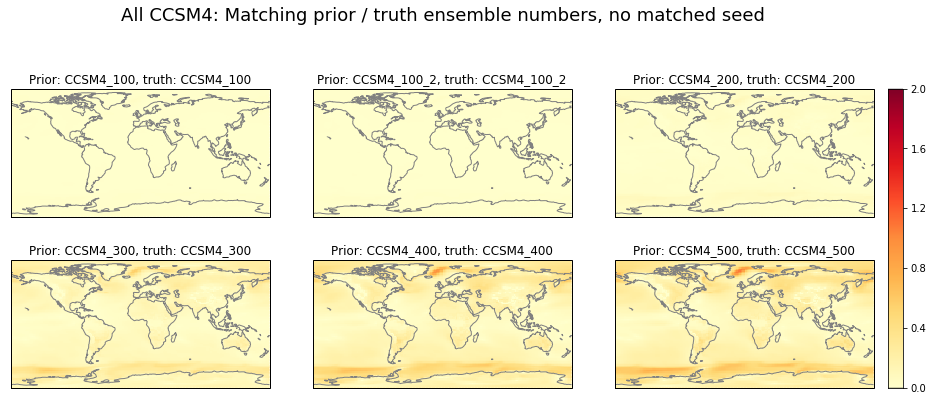

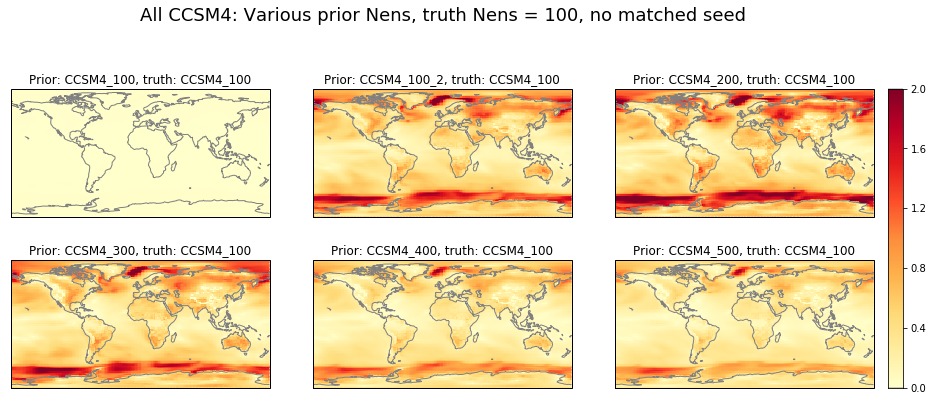

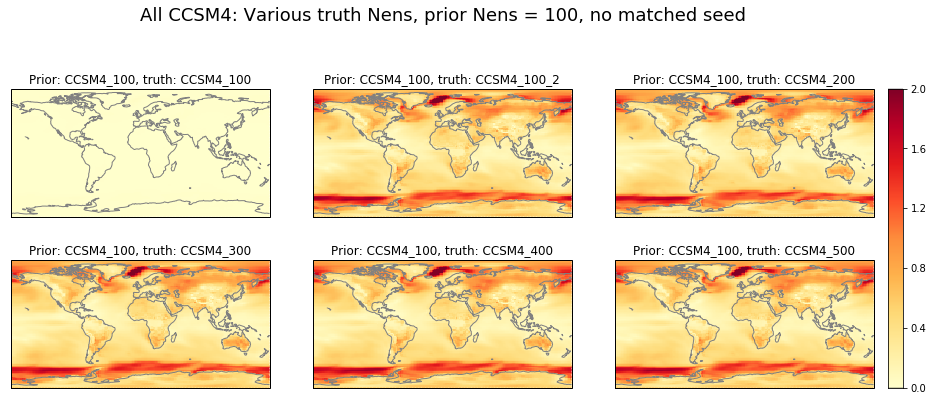

In [122]:
# Plot posterior covs for each
# Now with noseed

LOCRAD = 0.0
SNR = 100.0

cdd = np.load('/Users/dan/Desktop/Nullspace/pt_out/PAGES2k_locrad_Nens_tests_ccsm4_match_noseed0.0_snr_100.0.npy')
plt_rmse(cdd,'All CCSM4: Matching prior / truth ensemble numbers, no matched seed')

cdd = np.load('/Users/dan/Desktop/Nullspace/pt_out/PAGES2k_locrad_Nens_tests_ccsm4_noseed0.0_snr_100.0.npy')
plt_rmse(cdd,'All CCSM4: Various prior Nens, truth Nens = 100, no matched seed')

cdd = np.load('/Users/dan/Desktop/Nullspace/pt_out/PAGES2k_locrad_Nens_tests_ccsm4_varytruthNens_noseed0.0_snr_100.0.npy')
plt_rmse(cdd,'All CCSM4: Various truth Nens, prior Nens = 100, no matched seed')

#cdd = np.load('/Users/dan/Desktop/Nullspace/pt_out/PAGES2k_locrad_Nens_tests_mpi_noseed0.0_snr_100.0.npy')
#plt_rmse(cdd,'MPI and CCSM4: Various prior Nens, truth Nens = 100')




/Users/dan/anaconda2/envs/lmr_py3/lib/python3.6/site-packages/cartopy/util.py:102: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  new_data = ma.concatenate((data, data[slicer]), axis=axis)


IndexError: index 5 is out of bounds for axis 0 with size 5

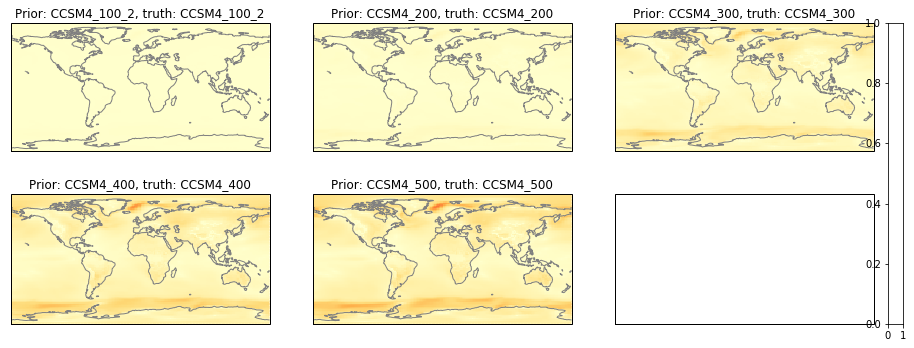

In [142]:
cdd = np.load('/Users/dan/Desktop/Nullspace/pt_out/PAGES2k_locrad_Nens_tests_ccsm4_match_noseed_esrf10000000.0_snr_100.0.npy')
plt_rmse(cdd,'All CCSM4: Various truth Nens, prior Nens = 100, no matched seed')

/Users/dan/anaconda2/envs/lmr_py3/lib/python3.6/site-packages/cartopy/util.py:102: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  new_data = ma.concatenate((data, data[slicer]), axis=axis)


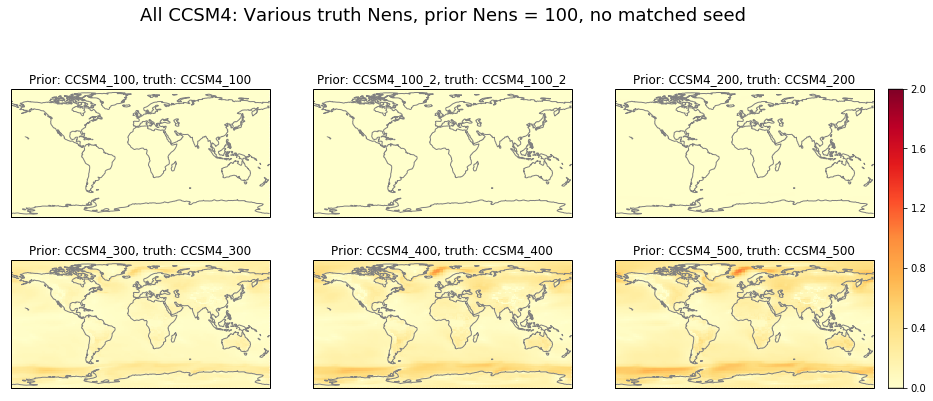

In [146]:
cdd = np.load('/Users/dan/Desktop/Nullspace/pt_out/PAGES2k_locrad_Nens_tests_ccsm4_match0.0_snr_1000.0.npy')
plt_rmse(cdd,'All CCSM4: Various truth Nens, prior Nens = 100, no matched seed')

/Users/dan/anaconda2/envs/lmr_py3/lib/python3.6/site-packages/cartopy/util.py:102: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  new_data = ma.concatenate((data, data[slicer]), axis=axis)


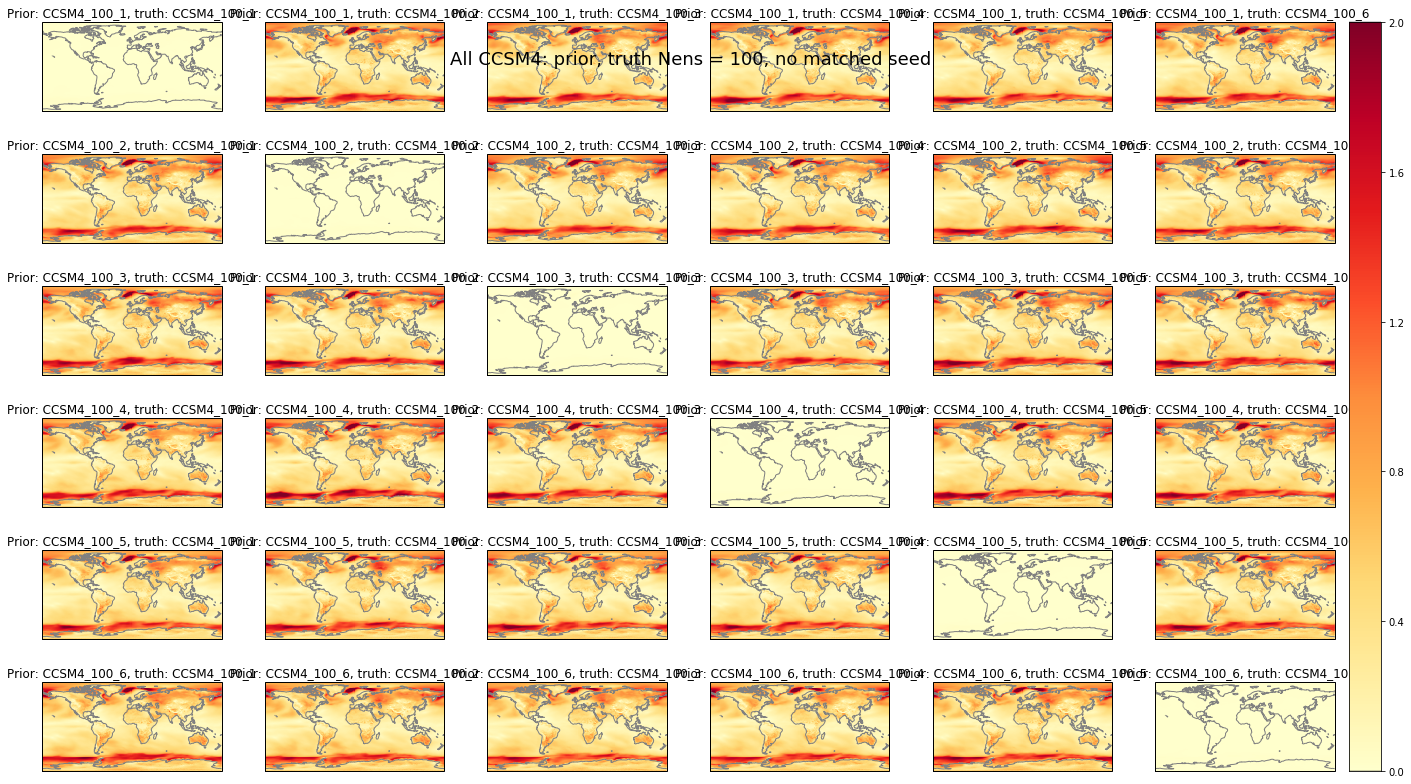

In [162]:
# Big 6x6 of random draws
# SNR = 100.


#cdd = np.load('/Users/dan/Desktop/Nullspace/pt_out/PAGES2k_locrad_Nens_tests_ccsm4_noseed_all100_0.0_snr_100.0.npy')
plt_rmse6(cdd,'All CCSM4: prior, truth Nens = 100, no matched seed')



/Users/dan/anaconda2/envs/lmr_py3/lib/python3.6/site-packages/cartopy/util.py:102: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  new_data = ma.concatenate((data, data[slicer]), axis=axis)


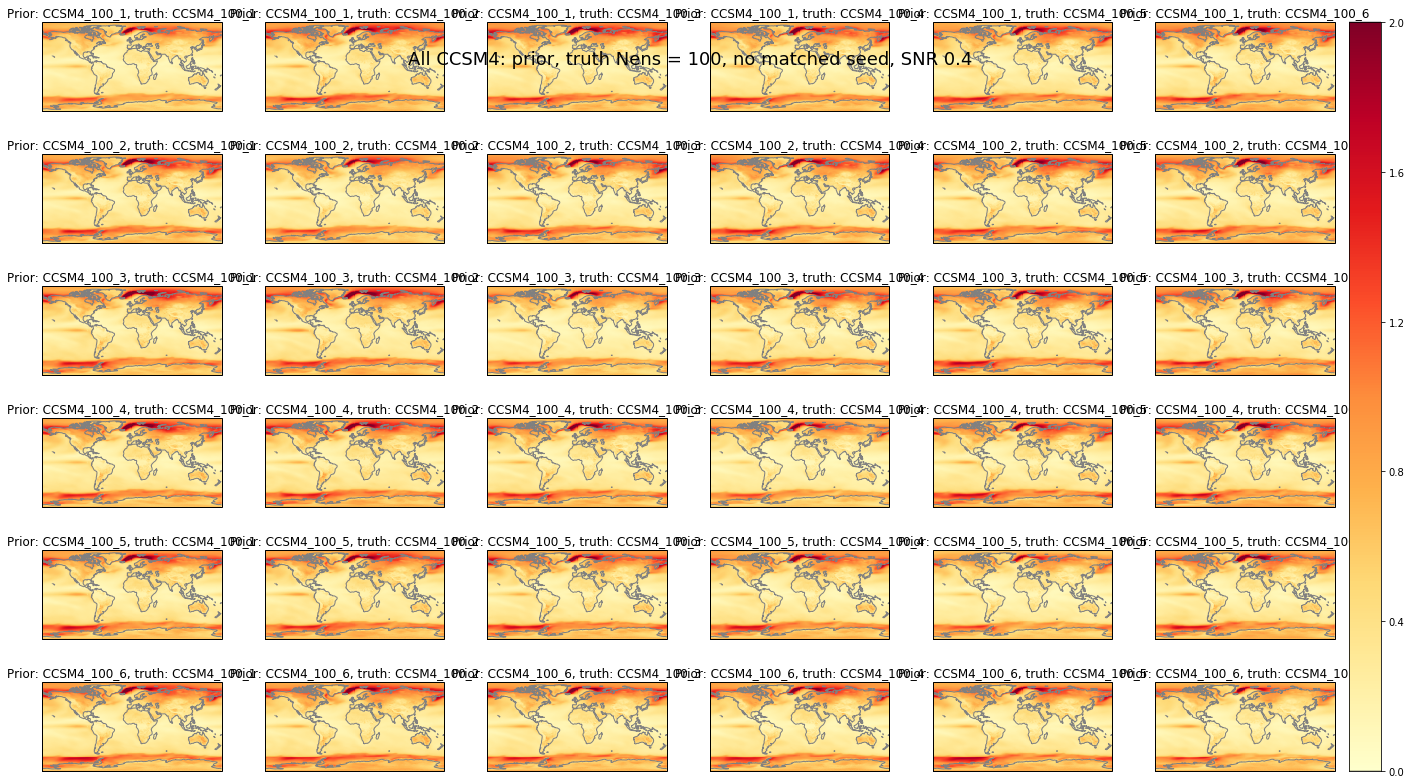

In [165]:
# Big 6x6 of random draws
# SNR = 0.4


#cdd = np.load('/Users/dan/Desktop/Nullspace/pt_out/PAGES2k_locrad_Nens_tests_ccsm4_noseed_all100_0.0_snr_0.4.npy')
plt_rmse6(cdd,'All CCSM4: prior, truth Nens = 100, no matched seed, SNR 0.4')




/Users/dan/anaconda2/envs/lmr_py3/lib/python3.6/site-packages/cartopy/util.py:102: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  new_data = ma.concatenate((data, data[slicer]), axis=axis)


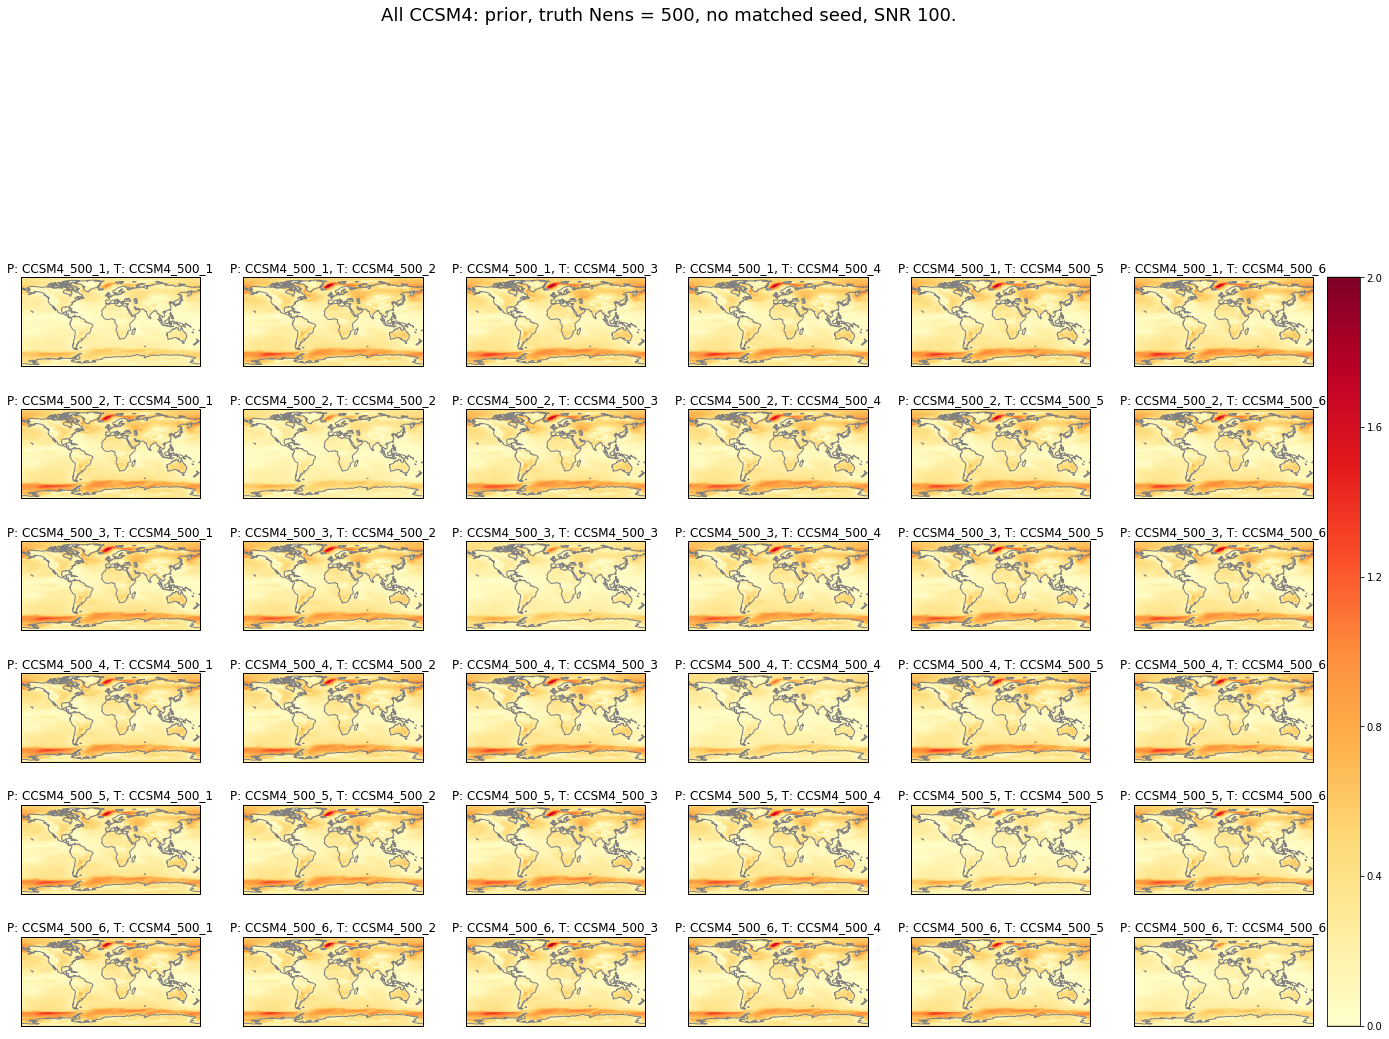

In [177]:
# Big 6x6 of random draws
# SNR = 0.4
# Nens = 500


#cdd = np.load('/Users/dan/Desktop/Nullspace/pt_out/PAGES2k_locrad_Nens_tests_ccsm4_noseed_all100_0.0_snr_0.4.npy')
plt_rmse6(cdd,'All CCSM4: prior, truth Nens = 500, no matched seed, SNR 100.')

/Users/dan/anaconda2/envs/lmr_py3/lib/python3.6/site-packages/cartopy/util.py:102: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  new_data = ma.concatenate((data, data[slicer]), axis=axis)


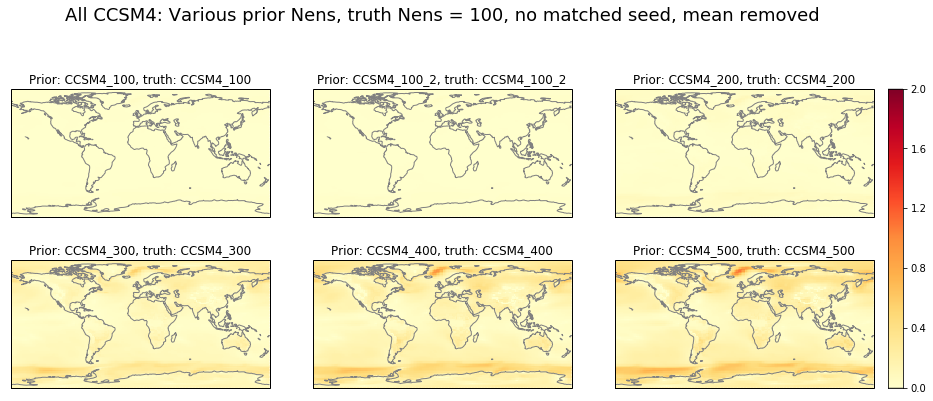

In [275]:
# Sandbox

#cdd = np.load('/Users/dan/Desktop/Nullspace/pt_out/PAGES2k_locrad_Nens_tests_ccsm4_match_noseed_nomean_0.0_snr_100.0.npy')
plt_rmse(cdd,'All CCSM4: Various prior Nens, truth Nens = 100, no matched seed, mean removed')

In [9]:
# Trying with everything defined as functions to avoid variable contamination

ad=mk_ad()

> <ipython-input-3-b8a6c817c986>(20)mk_ad()
-> for ii in np.arange(len(lmr_names)):


(Pdb)  c


Checking configuration ... 
OK!
Reading file:  /Users/dan/Desktop/LMR_py3/data/model/ccsm4_last_millenium/tas_sfc_Amon_CCSM4_past1000_085001-185012.nc
(12012, 192, 288)
indlat= 0  indlon= 1
Anomalies provided as the prior: Removing the temporal mean (for every gridpoint)...
tas : Global(monthly): mean= 8.072375e-07  , std-dev= 1.8899411
Averaging over month sequence: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
tas : Global(time-averaged): mean= 4.4424884352419226e-08  , std-dev= 0.8317386411161235
 
State vector information:
Nx = 55296
state_vect_info= {'tas_sfc_Amon': {'pos': (0, 55295), 'spacecoords': ('lat', 'lon'), 'spacedims': (192, 288), 'vartype': '2D:horizontal'}}
Random selection of 100 ensemble members
regridding prior...
0 55295
(55296, 100)
(55296, 2)
(55296, 2)
tas_sfc_Amon  : 2D lat/lon variable, truncating this variable
nlat,nlon: 192 288
=> Full array:      -11.247562408447266 7.616621494293213 -0.007214761114431409 0.8384257279438592
=> Truncated array: -11.101190125702887

In [27]:
outpath = mkcdd(ad)

Checking configuration ... 
OK!
Checking configuration ... 
OK!
Checking configuration ... 
OK!
Checking configuration ... 
OK!
Checking configuration ... 
OK!
Checking configuration ... 
OK!
saving for LOCRAD = 0.0 and SNR = 100.0
/Users/dan/Desktop/Nullspace/pt_out/PAGES2k_locrad_Nens_tests_ccsm4_match_noseed_nomean_0.0_snr_100.0.npy
Done!


NameError: name 'grid' is not defined

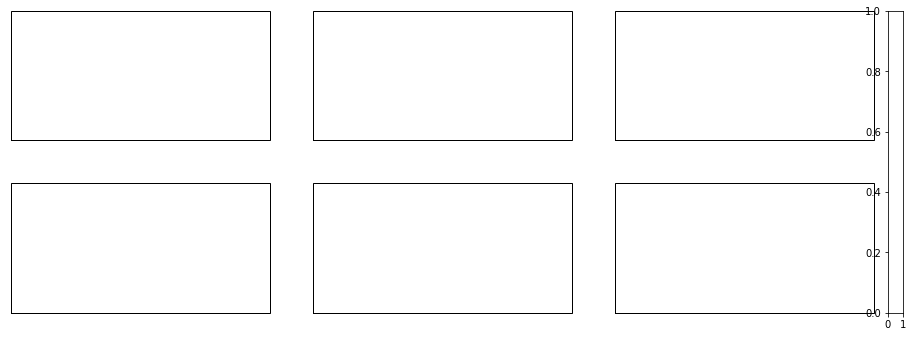

In [28]:
cdd = np.load('/Users/dan/Desktop/Nullspace/pt_out/PAGES2k_locrad_Nens_tests_ccsm4_match_noseed_nomean_0.0_snr_100.0.npy')


/Users/dan/anaconda2/envs/lmr_py3/lib/python3.6/site-packages/cartopy/util.py:102: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  new_data = ma.concatenate((data, data[slicer]), axis=axis)


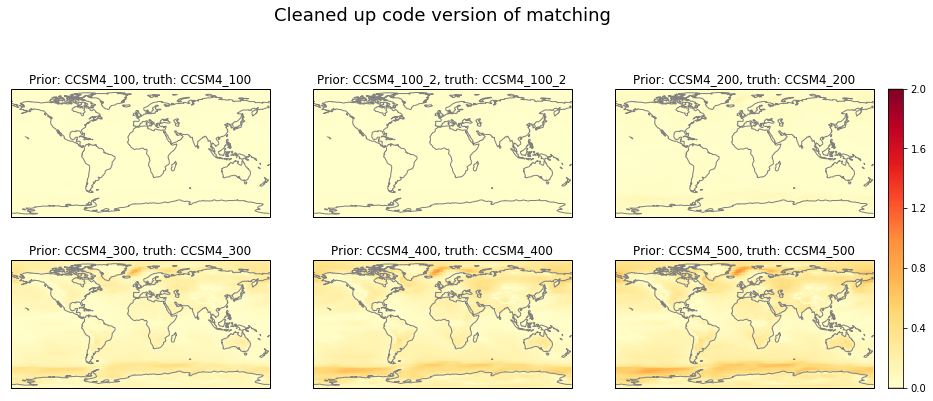

In [30]:
plt_rmse(cdd,'Cleaned up code version of matching')